## StackOverflow Developer Survey 2020 Analysis

### Overview
For ten years now, StackOverflow  has been conducting an annual Developer Survey. Survey results have been made publicly available, and they have been analyzed from many different corners to bring light into a developer profile and trends in the industry. 

As a developer, I am a frequent user of StackOverflow, and always find it very helpful. I have specific questions that I want to find out answers to by analaysing the latest Developer Survey result as of now (October, 2020). This survey was conducted in February 2020, right before the whole world entered the Covid-19 quarantine. I would be interested to compare what have changed since then in developers' profession and life in the upcoming survey. 

### Questions to explore:
1. What is the most popular database?
2. Who visits StackOverflow most?
3. What is the most important job factor for developers?

[Analysing Stack Overflow Developer Survey 2020](https://insights.stackoverflow.com/survey)

My analysis process is consists of three parts: 
1. **Data Exploration** - where I explore the data set and its attributes;
2. **Data Preparation** - where I clean, tidy and transform the data set;
3. **Data Analysis** - where I conduct analysis and find answers to my research questions.

## Data Exploration

In [205]:
# importing packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')
%matplotlib inline

#importing survey results to a pandas dataframe
df = pd.read_csv('survey_results_public.csv')

In [206]:
# taking a peak into the dataframe
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [207]:
df.shape 

(64461, 61)

In [208]:
print('There are', df.shape[0], 'rows in the StackOverflow Developer Survey 2020.')

There are 64461 rows in the StackOverflow Developer Survey 2020.


In [209]:
# summary statistics of numeric fields
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [210]:
# list of all fields
list(df.columns.values)

['Respondent',
 'MainBranch',
 'Hobbyist',
 'Age',
 'Age1stCode',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWCollabToolsWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWEdImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOnboardGood',
 'NEWOtherComms',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'NEWPurpleLink',
 'NEWSOSites',
 'NEWStuck',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseWhat',
 'Sexuality',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'UndergradMajor',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WelcomeChange',
 'W

> Below I will explore fields relevant to my questions.

In [211]:
df['DatabaseWorkedWith'].value_counts()

MySQL                                                                                     3827
Microsoft SQL Server                                                                      3298
PostgreSQL                                                                                1937
SQLite                                                                                    1313
Microsoft SQL Server;MySQL                                                                1158
                                                                                          ... 
Cassandra;Firebase;IBM DB2;MariaDB;Microsoft SQL Server;MySQL;Oracle;PostgreSQL;SQLite       1
DynamoDB;MariaDB;MySQL;Oracle;Redis                                                          1
Cassandra;DynamoDB;MariaDB;Microsoft SQL Server;MongoDB;MySQL;Oracle                         1
Couchbase;Firebase;Microsoft SQL Server;MongoDB;MySQL;PostgreSQL                             1
Cassandra;Firebase;MariaDB;MongoDB;MySQL;Oracle   

>  Seems like multiple values could be selected in **DatabaseWorkedWith** column. If I want to use this column for analysis, it would be a good idea to split each value. 

In [212]:
df['DatabaseDesireNextYear'].unique()

array(['Microsoft SQL Server', nan, 'MySQL;PostgreSQL', ...,
       'Elasticsearch;MySQL;Oracle;Redis;SQLite',
       'Couchbase;DynamoDB;Elasticsearch;Firebase;IBM DB2;Oracle;PostgreSQL',
       'Elasticsearch;IBM DB2;Oracle'], dtype=object)

> **DatabaseDesireNextYear** column values need to be separated.

In [213]:
df['SOVisitFreq'].value_counts()

Daily or almost daily                                 17372
Multiple times per day                                16273
A few times per week                                  13493
A few times per month or weekly                        7901
Less than once per month or monthly                    1739
I have never visited Stack Overflow (before today)      192
Name: SOVisitFreq, dtype: int64

> Althouth a bit long, values of **SOVisitFreq** column does not require a transformation.

In [214]:
df['Gender'].value_counts()

Man                                                            46013
Woman                                                           3844
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

> **Gender** column values either need to be separated or simplified for better or easier analysis.

In [215]:
df['Age'].value_counts()

25.0    2693
28.0    2412
30.0    2406
26.0    2391
27.0    2338
        ... 
23.8       1
95.0       1
31.5       1
20.5       1
16.5       1
Name: Age, Length: 110, dtype: int64

In [216]:
print('Min val of age:', df['Age'].min(), ' and max val of age:', df['Age'].max())

Min val of age: 1.0  and max val of age: 279.0


> **Age** column values seem to be unreliable as 1 year olds do not use StackOverflow, and humans can not live for 279 year. For analysis purposes, I may need to get a specific age group, for example 15 - 60. 

In [217]:
df['YearsCode'].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [218]:
df['YearsCodePro'].unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

> **YearsCode** and **YearsCodePro** column values are cleaner, but I may need to remove non-numeric values and convert the column type to numeric. 

In [219]:
df['JobFactors'].value_counts().nlargest(10)

Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Remote work options                                               2777
Languages, frameworks, and other technologies I’d be working with;Office environment or company culture;Opportunities for professional development                   2570
Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Office environment or company culture                             2508
Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Opportunities for professional development                        1666
Flex time or a flexible schedule;Office environment or company culture;Opportunities for professional development                                                    1650
Flex time or a flexible schedule;Remote work options;Office environment or company culture                                                            

> **JobFactors** column values need to be separated.

In [220]:
df['MainBranch'].value_counts()

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

In [221]:
df['Hobbyist'].value_counts()

Yes    50388
No     14028
Name: Hobbyist, dtype: int64

In [222]:
df['Country'].value_counts()

United States                         12469
India                                  8403
United Kingdom                         3896
Germany                                3890
Canada                                 2191
                                      ...  
Gabon                                     1
Mali                                      1
Micronesia, Federated States of...        1
Marshall Islands                          1
Saint Lucia                               1
Name: Country, Length: 183, dtype: int64

In [223]:
df['JobSeek'].value_counts()

I’m not actively looking, but I am open to new opportunities    29776
I am not interested in new job opportunities                    13001
I am actively looking for a job                                  8950
Name: JobSeek, dtype: int64

>  **MainBranch**, **Country**, **Hobbyist** and **Jobseek** column values are clean, and do not need a transformation.

## Data Preparation

> In this section, I will prepare the data to perform analysis. 
I will transform the shape of data, columns, rows and values when necessary.

In [224]:
# Drop unnecessary columns
df = df[['Respondent', 'Gender', 'Age', 'JobFactors','DatabaseWorkedWith', 'DatabaseDesireNextYear', 
                  'YearsCode', 'YearsCodePro', 'SOVisitFreq','MainBranch',  'Hobbyist','Country', 'JobSeek']]
df.head()

,Respondent,Gender,Age,JobFactors,DatabaseWorkedWith,DatabaseDesireNextYear,YearsCode,YearsCodePro,SOVisitFreq,MainBranch,Hobbyist,Country,JobSeek
0,1,Man,NaN,"Languages, frameworks, and other technologies ...",Elasticsearch;Microsoft SQL Server;Oracle,Microsoft SQL Server,36,27,Multiple times per day,I am a developer by profession,Yes,Germany,I am not interested in new job opportunities
1,2,NaN,NaN,NaN,NaN,NaN,7,4,Multiple times per day,I am a developer by profession,No,United Kingdom,I am not interested in new job opportunities
2,3,NaN,NaN,NaN,NaN,NaN,4,NaN,Daily or almost daily,I code primarily as a hobby,Yes,Russian Federation,NaN
3,4,Man,25.0,Flex time or a flexible schedule;Office enviro...,NaN,NaN,7,4,Multiple times per day,I am a developer by profession,Yes,Albania,"I’m not actively looking, but I am open to new..."
4,5,Man,31.0,NaN,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,15,8,A few times per month or weekly,"I used to be a developer by profession, but no...",Yes,United States,NaN


> Above I simplified the dataframe with only columns that interest me to find answers to the questions of research. 

In [225]:
# number of null values before cleaning
df.isnull().sum()

Respondent                    0
Gender                    13904
Age                       19015
JobFactors                15112
DatabaseWorkedWith        14924
DatabaseDesireNextYear    20391
YearsCode                  6777
YearsCodePro              18112
SOVisitFreq                7491
MainBranch                  299
Hobbyist                     45
Country                     389
JobSeek                   12734
dtype: int64

In [226]:
# number of records before cleaning
df.shape

(64461, 13)

In [227]:
# dropping any rows that contain at least one nan column value
df.dropna(axis=0, how='any', inplace=True)

In [228]:
# checking the data type of Age column
df['Age'].dtype

dtype('float64')

In [229]:
# dropping rows where Age is above 85 and below 8. I am not sure if 8 years olds use StackOverflow, 
# but I had to come up with an arbitrary number.
df.drop(df[df['Age'] > 85].index, inplace = True) 
df.drop(df[df['Age'] < 8].index, inplace = True) 

In [230]:
# number of records after cleaning
df.shape

(26466, 13)

In [231]:
# checking the number of null values after cleaning
df.isnull().sum()

Respondent                0
Gender                    0
Age                       0
JobFactors                0
DatabaseWorkedWith        0
DatabaseDesireNextYear    0
YearsCode                 0
YearsCodePro              0
SOVisitFreq               0
MainBranch                0
Hobbyist                  0
Country                   0
JobSeek                   0
dtype: int64

In [232]:
# simplifying Gender field
gender_conditions = [(df['Gender'] == 'Man'),
                         (df['Gender'] == 'Woman'),
                         (df['Gender'] != 'Man') & (df['Gender'] != 'Woman') 
                         & (pd.isnull(df['Gender']) == False)]

gender_cats = ['Male', 'Female', 'Other']

df['Gender'] = np.select(gender_conditions, gender_cats, default = np.NaN)
df['Gender'].value_counts()

Male      24434
Female     1739
Other       293
Name: Gender, dtype: int64

In [233]:
# function to separate and pivot values in a column
def separate(val):
    values = {}
    if not isinstance(val, str) :
        return {}
    for l in val.split(';'):
        values[l] = 1;
    return values

> Above function is an adjusted form of a function written [here](https://github.com/kedevked/stackoverflow2018-survey/blob/master/stackoverflow_analysis.ipynb).

In [234]:
# separate and pivot DatabaseWorkedWith column values and save in a dataframe
pop_dbs = df['DatabaseWorkedWith'].apply(lambda x: pd.Series(separate(x)))
print("There are {} different databases".format(pop_dbs.shape[1]))
pop_dbs.head()

There are 14 different databases


,MariaDB,MySQL,Redis,Microsoft SQL Server,Firebase,MongoDB,PostgreSQL,SQLite,Elasticsearch,IBM DB2,Oracle,DynamoDB,Cassandra,Couchbase
7,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
# shape of the dataset before revoming rows with all values NaN
pop_dbs.shape

(26466, 14)

In [236]:
# remove rows with all to be NaN
missing_sum = pop_dbs.isnull().sum(axis = 1)
pop_dbs = pop_dbs[missing_sum / pop_dbs.shape[1] < 1]
pop_dbs.head()

,MariaDB,MySQL,Redis,Microsoft SQL Server,Firebase,MongoDB,PostgreSQL,SQLite,Elasticsearch,IBM DB2,Oracle,DynamoDB,Cassandra,Couchbase
7,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
# shape of the dataset after removing rows with all values NaN
pop_dbs.shape

(26466, 14)

In [238]:
# fill NaNs with 0
pop_dbs = pop_dbs.fillna(0)
pop_dbs.head()

,MariaDB,MySQL,Redis,Microsoft SQL Server,Firebase,MongoDB,PostgreSQL,SQLite,Elasticsearch,IBM DB2,Oracle,DynamoDB,Cassandra,Couchbase
7,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Now let's repeat the same steps for DatabaseDesireNextYear columns.

In [239]:
# separate and pivot DatabaseDesireNextYear column values and save in a dataframe
desired_dbs = df['DatabaseDesireNextYear'].apply(lambda x: pd.Series(separate(x)))
print("There are {} different databases desired for next year".format(desired_dbs.shape[1]))
desired_dbs.head()

There are 14 different databases desired for next year


,MongoDB,Microsoft SQL Server,Firebase,PostgreSQL,Cassandra,Elasticsearch,MariaDB,Redis,SQLite,MySQL,DynamoDB,Couchbase,Oracle,IBM DB2
7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
# shape of the dataset before revoming rows with all values NaN
desired_dbs.shape

(26466, 14)

In [241]:
# remove rows with all to be NaN
missing_sum = desired_dbs.isnull().sum(axis = 1)
desired_dbs = desired_dbs[missing_sum / desired_dbs.shape[1] < 1]
desired_dbs.head()

,MongoDB,Microsoft SQL Server,Firebase,PostgreSQL,Cassandra,Elasticsearch,MariaDB,Redis,SQLite,MySQL,DynamoDB,Couchbase,Oracle,IBM DB2
7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
# shape of the dataset after removing rows with all values NaN
desired_dbs.shape

(26466, 14)

In [243]:
# fill NaNs with 0
desired_dbs = desired_dbs.fillna(0)
desired_dbs.head()

,MongoDB,Microsoft SQL Server,Firebase,PostgreSQL,Cassandra,Elasticsearch,MariaDB,Redis,SQLite,MySQL,DynamoDB,Couchbase,Oracle,IBM DB2
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [244]:
# Create dataframe containing split string values by respondent number
def split_list(df, col):
    """Create a new dataframe that splits the values of multi-selection column col into individual selections and 
    places each selection value on a separate row. This new dataframe can be linked back to the original dataframe by 
    Respondent value.
    
    Args:
    df: dataframe. Dataframe containing the multi-selection field col.
       
    Returns:
    out_df: dataframe. New dataframe giving split values of col.
    """
    in_res = list(df['Respondent'])
    in_list = list(df[col])
    
    out_res = []
    out_list = []
    
    for i in range(len(in_list)):
        if pd.isnull(in_list[i]) == False:
            vals = in_list[i].split(';')
            res = [in_res[i]]*len(vals)
            
            out_list.append(vals)
            out_res.append(res)
    
    out_df = pd.DataFrame({'Respondent': list(np.concatenate(out_res)), col: list(np.concatenate(out_list))})
    
    return out_df

> I relied on [here](https://github.com/gkhayes/ds_survey_analysis/blob/master/DS%20Survey%20Analysis.ipynb) for the above function.

In [245]:
# separte and pivot JobFactors column values and save in a data frame
job_factors = df['JobFactors'].apply(lambda x: pd.Series(separate(x)))
print("There are {} different job factors".format(job_factors.shape[1]))
job_factors.head()

There are 11 different job factors


,Remote work options,Opportunities for professional development,Family friendliness,Flex time or a flexible schedule,How widely used or impactful my work output would be,"Languages, frameworks, and other technologies I’d be working with",Industry that I’d be working in,Office environment or company culture,Specific department or team I’d be working on,Financial performance or funding status of the company or organization,Diversity of the company or organization
7,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
10,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN


In [246]:
# remove rows with all columns NaN
missing_sum = job_factors.isnull().sum(axis = 1)
job_factors = job_factors[missing_sum / job_factors.shape[1] < 1]

# fill NaNs with 0
job_factors = job_factors.fillna(0)
job_factors.head()

,Remote work options,Opportunities for professional development,Family friendliness,Flex time or a flexible schedule,How widely used or impactful my work output would be,"Languages, frameworks, and other technologies I’d be working with",Industry that I’d be working in,Office environment or company culture,Specific department or team I’d be working on,Financial performance or funding status of the company or organization,Diversity of the company or organization
7,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [247]:
# replacing string values to numeric
df['YearsCode'].replace('Less than 1 year', 0, inplace=True)
df['YearsCode'].replace('More than 50 years', 55, inplace=True) 
df['YearsCodePro'].replace('Less than 1 year', 0, inplace=True)
df['YearsCodePro'].replace('More than 50 years', 55, inplace=True) 

In [248]:
# converting data type of YearsCode and YearsCodePro from string to numeric
df['YearsCode'] = pd.to_numeric(df['YearsCode'])
df['YearsCodePro'] = pd.to_numeric(df['YearsCode'])

In [249]:
df['YearsCode'].dtype, df['YearsCodePro'].dtype

(dtype('int64'), dtype('int64'))

In [250]:
# create a subset of StackOverflow heavy-users
heavy_users = df[(df['SOVisitFreq'] == 'Multiple times per day') |  (df['SOVisitFreq'] == 'Daily or almost daily')]
heavy_users.head(3)

,Respondent,Gender,Age,JobFactors,DatabaseWorkedWith,DatabaseDesireNextYear,YearsCode,YearsCodePro,SOVisitFreq,MainBranch,Hobbyist,Country,JobSeek
7,8,Male,36.0,Remote work options;Opportunities for professi...,MariaDB;MySQL;Redis,MongoDB,17,17,Multiple times per day,I am a developer by profession,Yes,United States,"I’m not actively looking, but I am open to new..."
9,10,Male,22.0,Flex time or a flexible schedule;How widely us...,Microsoft SQL Server,Microsoft SQL Server,8,8,Multiple times per day,I am a developer by profession,Yes,United Kingdom,"I’m not actively looking, but I am open to new..."
10,11,Male,23.0,"Flex time or a flexible schedule;Languages, fr...",Firebase;MongoDB;PostgreSQL;SQLite,Firebase;MongoDB;PostgreSQL,10,10,Multiple times per day,I am a developer by profession,Yes,United Kingdom,I am actively looking for a job


> I will use the **heavy_users** data subset when drawing a profile of a StackOverflow user.

## Data Analysis

> In this section, I find answers to my questions by analyzing the data. Vizualizing the data will help me to find accurate answers. 

### 1. What is the most popular database?

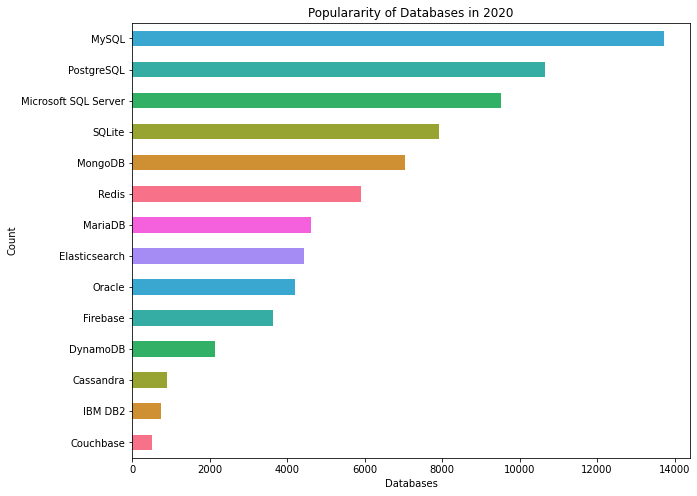

In [251]:
# Number of users for databases desired next year
ax = pop_dbs.sum().sort_values(ascending=True).plot(kind="barh", figsize=(10, 8), color=sns.color_palette("husl", 8));
ax.set_xlabel("Databases")
ax.set_ylabel("Count")
ax.set_title('Populararity of Databases in 2020');

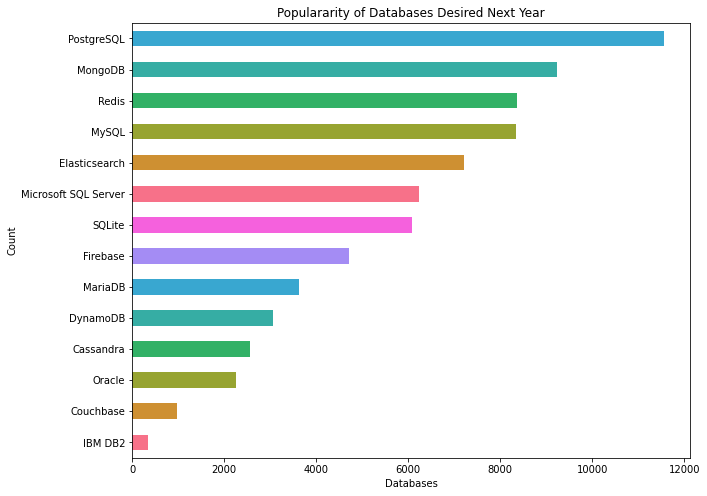

In [252]:
# Number of users for databases desired next year
ax = desired_dbs.sum().sort_values(ascending=True).plot(kind="barh", figsize=(10, 8), color=sns.color_palette("husl", 8));
ax.set_xlabel("Databases")
ax.set_ylabel("Count")
ax.set_title('Populararity of Databases Desired Next Year');

### 2. Who uses StackOverflow most?

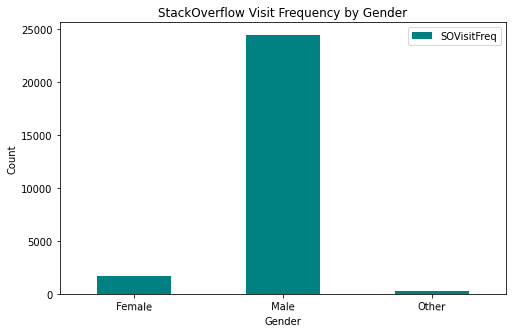

In [253]:
df[['SOVisitFreq', 'Gender']].groupby(['Gender']).count().plot(kind="bar",  figsize=(8,5),color='teal');
plt.title('StackOverflow Visit Frequency by Gender');
plt.ylabel('Count');
plt.xticks(rotation=-1);

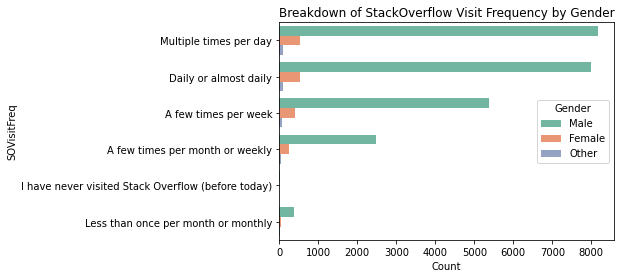

In [254]:
# Multi-bar Plot
sns.countplot(y="SOVisitFreq", hue="Gender", data=df, palette="Set2")
plt.xlabel("Count");
plt.title('Breakdown of StackOverflow Visit Frequency by Gender');

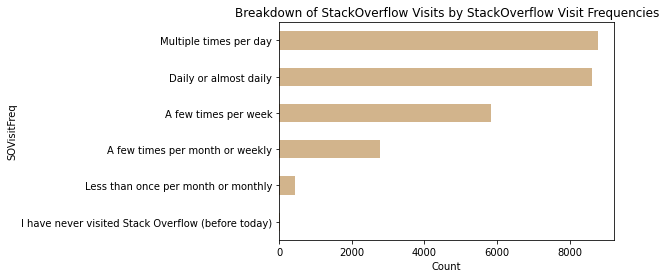

In [255]:
df.groupby(['SOVisitFreq'])['YearsCode'].count().sort_values(ascending=True).plot(kind='barh', color='tan');
plt.xlabel('Count');
plt.title('Breakdown of StackOverflow Visits by StackOverflow Visit Frequencies');

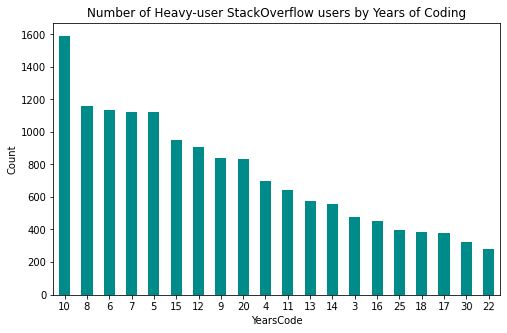

In [256]:
heavy_users.groupby(['YearsCode'])['SOVisitFreq'].count().sort_values(ascending=False).head(20).plot(kind='bar', \
                                                                             figsize=(8, 5), color='darkcyan');
plt.xticks(rotation=-1);
plt.ylabel('Count');
plt.title('Number of Heavy-user StackOverflow users by Years of Coding');

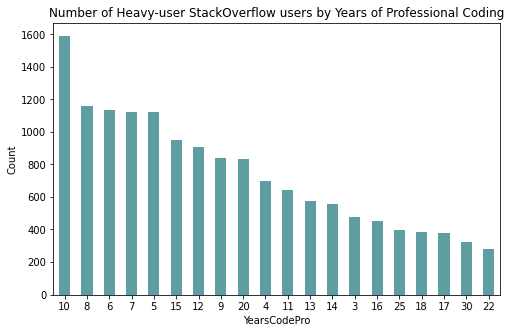

In [257]:
heavy_users.groupby(['YearsCodePro'])['SOVisitFreq'].count().sort_values(ascending=False).head(20).plot(kind='bar',\
                                                                                        figsize=(8, 5), color='cadetblue');
plt.xticks(rotation=-1);
plt.ylabel('Count');
plt.title('Number of Heavy-user StackOverflow users by Years of Professional Coding');

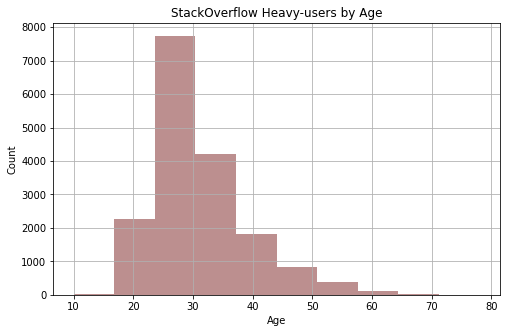

In [258]:
heavy_users['Age'].hist(figsize= (8, 5), color='rosybrown');
plt.title('StackOverflow Heavy-users by Age');
plt.xlabel('Age');
plt.ylabel('Count');

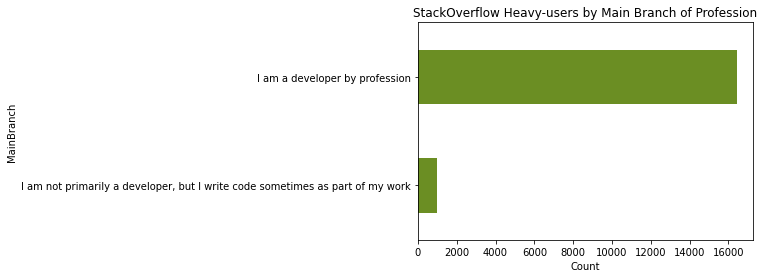

In [259]:
heavy_users.groupby(['MainBranch'])['SOVisitFreq'].count().sort_values(ascending=True).plot(kind='barh', \
                                                                                            color='olivedrab');
plt.title('StackOverflow Heavy-users by Main Branch of Profession');
plt.xlabel('Count');

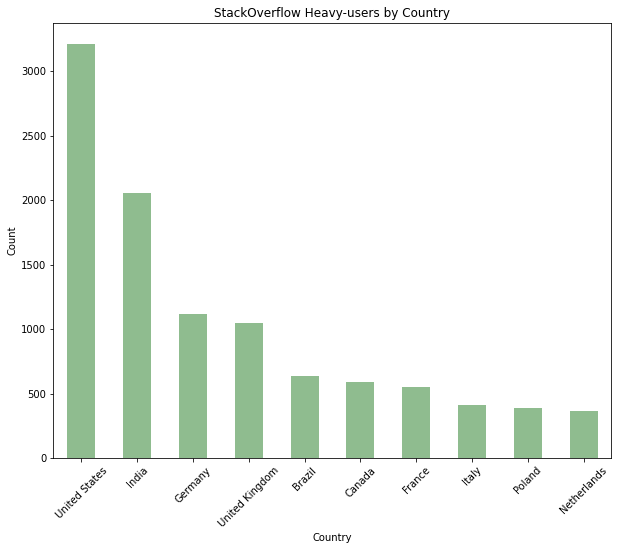

In [260]:
heavy_users.groupby(['Country'])['SOVisitFreq'].count().sort_values(ascending=False).head(10).plot(kind='bar',\
                                                                                    figsize=(10,8), color='darkseagreen');
plt.xticks(rotation=45);
plt.xlabel('Country');
plt.ylabel('Count');
plt.title('StackOverflow Heavy-users by Country');

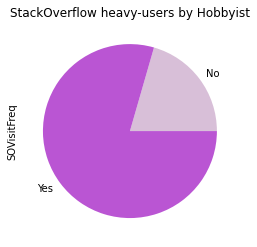

In [261]:
heavy_users.groupby(['Hobbyist'])['SOVisitFreq'].count().plot(kind='pie', colors=['thistle','mediumorchid']);
plt.title('StackOverflow heavy-users by Hobbyist');

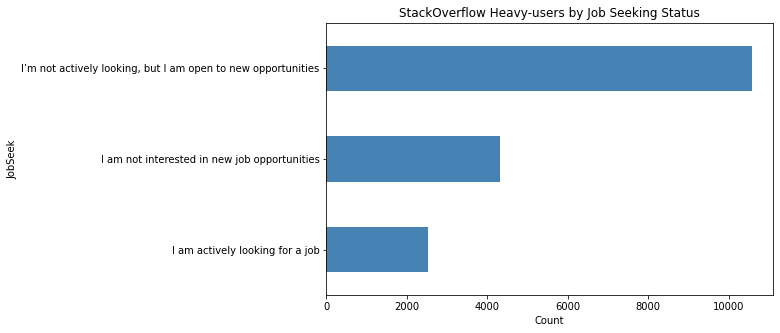

In [262]:
heavy_users.groupby(['JobSeek'])['SOVisitFreq'].count().sort_values(ascending=True).plot(kind='barh', \
                                                                        color='steelblue', figsize=(8,5));
plt.title('StackOverflow Heavy-users by Job Seeking Status');
plt.xlabel('Count');

### 3. What contributes most in developers' choice of job?

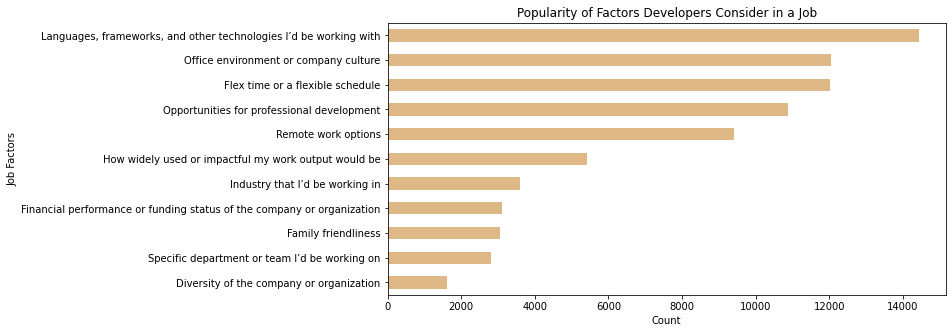

In [263]:
# Number of users voted for JobFactors
ax = job_factors.sum().sort_values(ascending=True).plot(kind="barh", figsize=(10, 5), color='burlywood');
ax.set_xlabel("Count")
ax.set_ylabel("Job Factors")
ax.set_title('Popularity of Factors Developers Consider in a Job');